# Kuramoto Model

In this example, we will simulate the Kuramoto model, which is a model of coupled oscillators. The Kuramoto model is defined by the following system of differential equations:
$$ \frac{d \theta_i}{dt} = \omega_i + \zeta_i + \frac{K}{N} \sum_{j=1}^N A_{ij} sin(\theta_j(t - \tau_{ij}) - \theta_i(t)) + h_i(t)$$
here $\theta_i$ is the phase of oscillator $i$, $\omega_i$ is the natural frequency of oscillator $i$, $\zeta_i$ is the noise term, $K$ is the global coupling strength, $A$ is the coupling matrix, $\tau_{ij}$ is the phase lag between oscillator $i$ and $j$, and $h_i(t)$ is the external input to oscillator $i$.

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

# Let's import the Kuramoto model
from neurolib.models.kuramoto import KuramotoModel
from neurolib.models.kuramoto.loadDefaultParams import loadDefaultParams

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

# Single node simulation 

In [3]:
model = KuramotoModel()
model.params['duration'] = 0.01*1000 # ms
model.run()


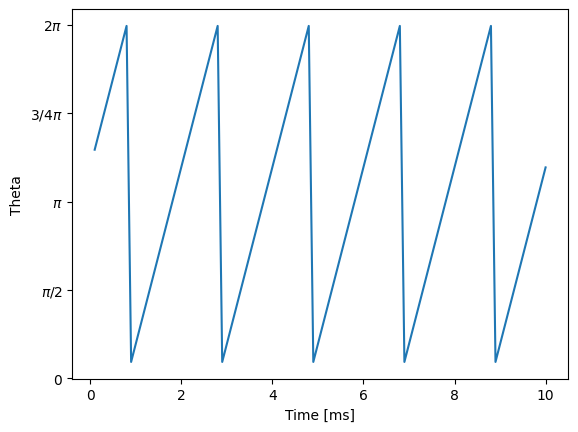

In [4]:
theta = model['theta']

plt.plot(model.t, theta.T)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

# Network simulation

Here we simulate networks of oscillators. 

In [5]:
# loading default parameters
params = loadDefaultParams()
# setting the coupling matrix
params.duration = 0.01*1000
params.N = 8
params.k = 2
params.Cmat = np.ones((params.N, params.N))
params.lengthMat = np.zeros((params.N, params.N))
params.omega = np.random.normal(loc=np.pi, scale=np.pi, size=(params.N,))
params.theta_init = np.random.uniform(low=0, high=2*np.pi, size=(params.N, 1))
params.theta_ou = np.zeros((params.N,))
params.sigma_ou = 0.0

In [6]:
network_model = KuramotoModel(params=params)
network_model.run()

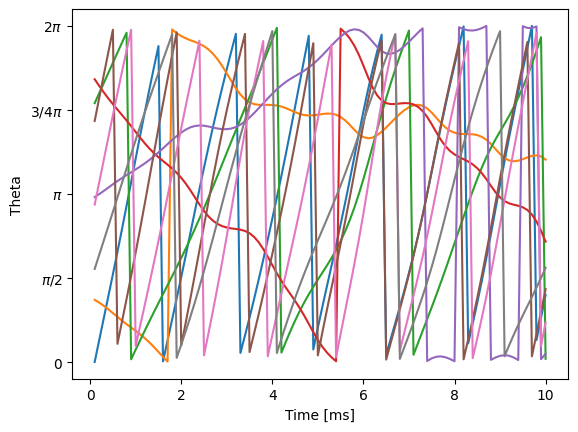

In [7]:
theta = network_model['theta']

plt.plot(network_model.t, theta.T)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

Now we try to increase global coupling to see if synchronization occurs.

In [8]:
params.k = 8

network_model = KuramotoModel(params=params)
network_model.run(chunkwise=True)

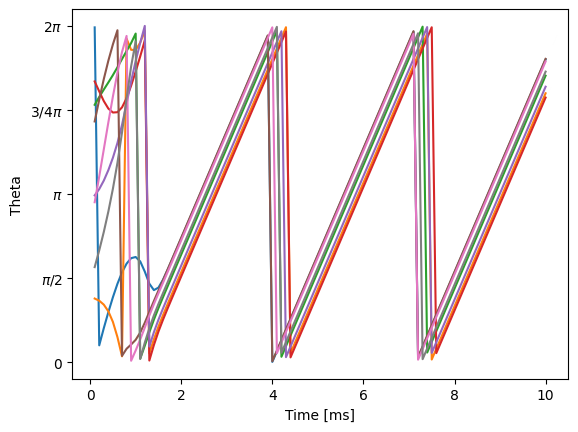

In [9]:
theta = network_model['theta']

plt.plot(network_model.t, theta.T)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

increasing global coupling seems to increase synchronization although there is some oscillators that are not synchronized.